In [ ]:
%cd ..

In [2]:
import argparse
import collections
import pyro
import torch
import numpy as np
import data_loader.data_loaders as module_data
import model.model as module_arch
from parse_config import ConfigParser
from trainer import Trainer

In [3]:
%matplotlib inline

In [4]:
pyro.enable_validation(True)
torch.autograd.set_detect_anomaly(True)

In [5]:
# fix random seeds for reproducibility
SEED = 123
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(SEED)

In [6]:
Args = collections.namedtuple('Args', 'config resume device')
config = ConfigParser.from_args(Args(config='mnist_config.json', resume=None, device=None))

In [7]:
logger = config.get_logger('train')

In [8]:
# setup data_loader instances
data_loader = config.init_obj('data_loader', module_data)
valid_data_loader = data_loader.split_validation()

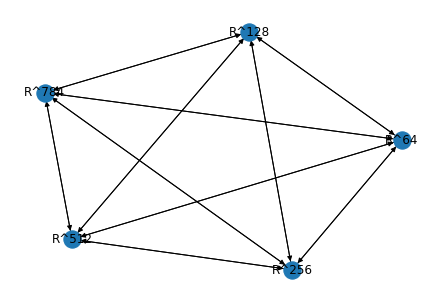

In [9]:
# build model architecture, then print to console
model = config.init_obj('arch', module_arch)
model.draw()

In [10]:
optimizer = pyro.optim.ReduceLROnPlateau({
    'optimizer': torch.optim.Adam,
    'optim_args': {
        "lr": 1e-4,
        "weight_decay": 0,
        "amsgrad": True
    },
    "patience": 20,
    "factor": 0.5,
    "verbose": True,
})

In [11]:
# optimizer = config.init_obj('optimizer', pyro.optim)

In [12]:
trainer = Trainer(model, [], optimizer, config=config,
                  data_loader=data_loader,
                  valid_data_loader=valid_data_loader,
                  lr_scheduler=optimizer)

In [13]:
trainer.train()

Train Epoch: 1 [256/54000 (0%)] Loss: 62012.156250
Train Epoch: 1 [4352/54000 (8%)] Loss: 34064.183594
Train Epoch: 1 [8448/54000 (16%)] Loss: 39268.304688
Train Epoch: 1 [12544/54000 (23%)] Loss: 38004.867188
Train Epoch: 1 [16640/54000 (31%)] Loss: 15848.140625
Train Epoch: 1 [20736/54000 (38%)] Loss: 31489.738281
Train Epoch: 1 [24832/54000 (46%)] Loss: 47749.347656
Train Epoch: 1 [28928/54000 (54%)] Loss: 26392.355469
Train Epoch: 1 [33024/54000 (61%)] Loss: -14459.250000
Train Epoch: 1 [37120/54000 (69%)] Loss: -45555.269531
Train Epoch: 1 [41216/54000 (76%)] Loss: -135379.265625
Train Epoch: 1 [45312/54000 (84%)] Loss: -111805.625000
Train Epoch: 1 [49408/54000 (91%)] Loss: 30499.076172
    epoch          : 1
    loss           : 7796.22177972561
    val_loss       : -84855.99814453124
Train Epoch: 2 [256/54000 (0%)] Loss: -171246.296875
Train Epoch: 2 [4352/54000 (8%)] Loss: -122282.812500
Train Epoch: 2 [8448/54000 (16%)] Loss: -196563.812500
Train Epoch: 2 [12544/54000 (23%)] 